In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import plotly.colors as colors

pio.templates.default = "plotly_white"

C:\Users\ASHISH\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data = pd.read_csv("superstore.csv", encoding = 'latin-1')

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


Monthly  sales  analysis

In [6]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

data['Order Month']= data['Order Date'].dt.month
data['Order year']= data['Order Date'].dt.year
data['Order Day of week']= data['Order Date'].dt.dayofweek

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_12272\4133755286.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Order Date'] = pd.to_datetime(data['Order Date'])
C:\Users\ASHISH\AppData\Local\Temp\ipykernel_12272\4133755286.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Ship Date'] = pd.to_datetime(data['Ship Date'])


In [7]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Month,Order year,Order Day of week
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,7,2012,1
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2,2013,1
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,10,2013,3
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,1,2013,0
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,11,2013,1


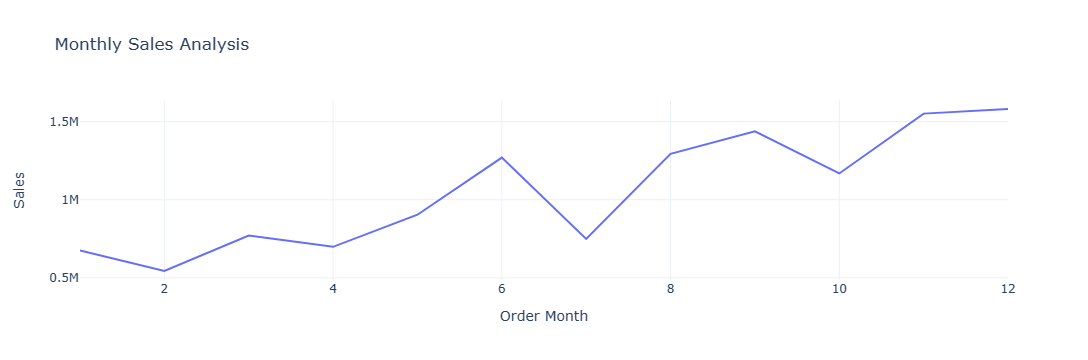

In [19]:
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
fig = px.line(sales_by_month, x = 'Order Month', y ='Sales', title = 'Monthly Sales Analysis')
fig.show()

In [16]:
callable('Order Month')

False

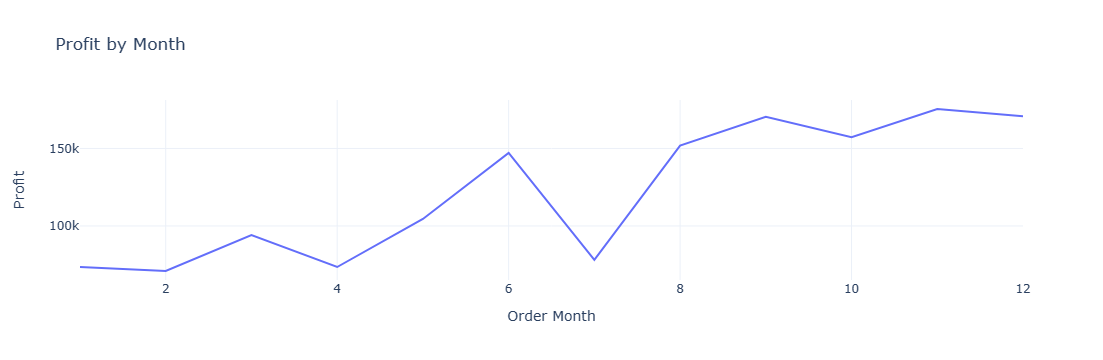

In [20]:
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()
fig = px.line(profit_by_month, x = 'Order Month', y = 'Profit', title = 'Profit by Month' )
fig.show()

sales of categories

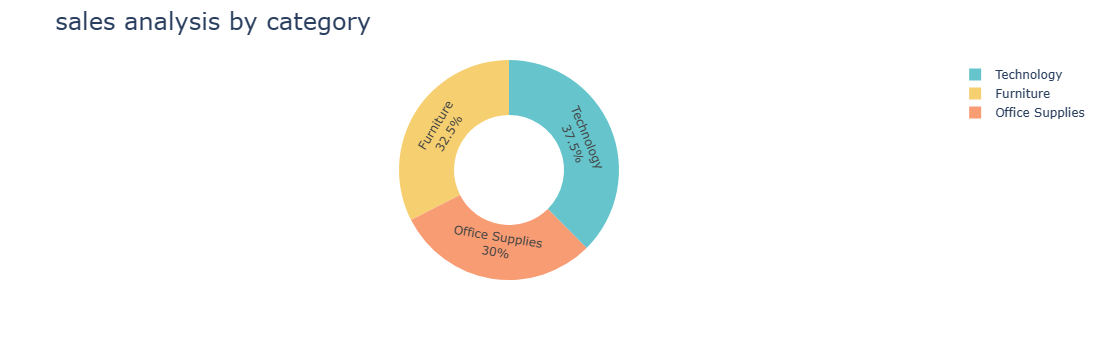

In [22]:
sales_by_category = data.groupby("Category")['Sales'].sum().reset_index()

fig= px.pie(sales_by_category, values = 'Sales', names = 'Category', hole = 0.5, color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_layout(title_text='sales analysis by category', title_font=dict(size=24))
fig.update_traces(textinfo = 'percent+label', textposition='inside')
fig.show()

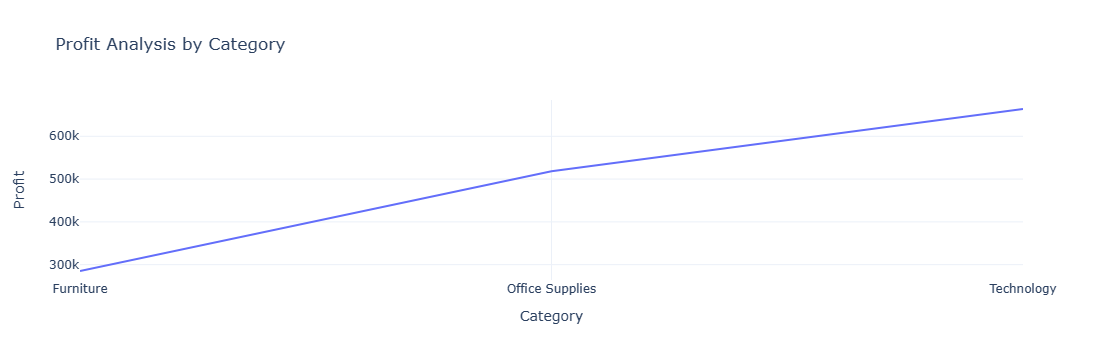

In [25]:
profit_by_category = data.groupby("Category")['Profit'].sum().reset_index()
fig = px.line(profit_by_category, x = 'Category', y = 'Profit', title = 'Profit Analysis by Category')
fig.show()

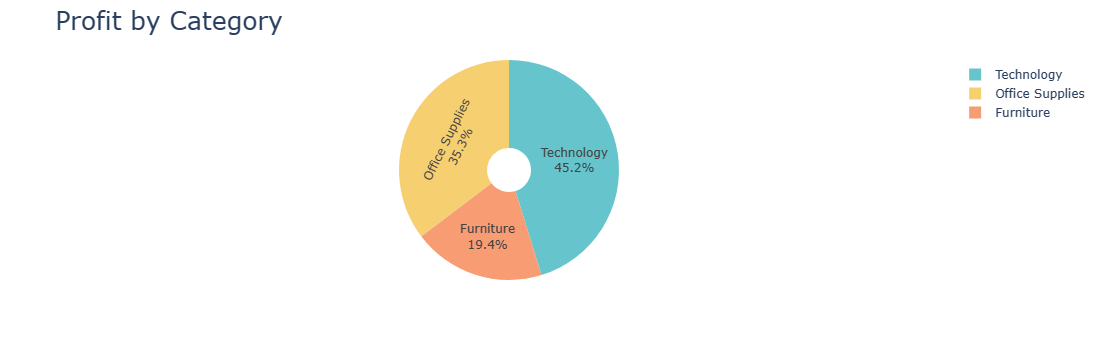

In [30]:
profit_by_category = data.groupby("Category")['Profit'].sum().reset_index()

fig = px.pie(profit_by_category, names= 'Category', values = 'Profit', hole = 0.2, color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_layout(title_text = 'Profit by Category', title_font= dict(size=25))
fig.update_traces(textinfo = 'percent+label', textposition ='inside')
fig.show()

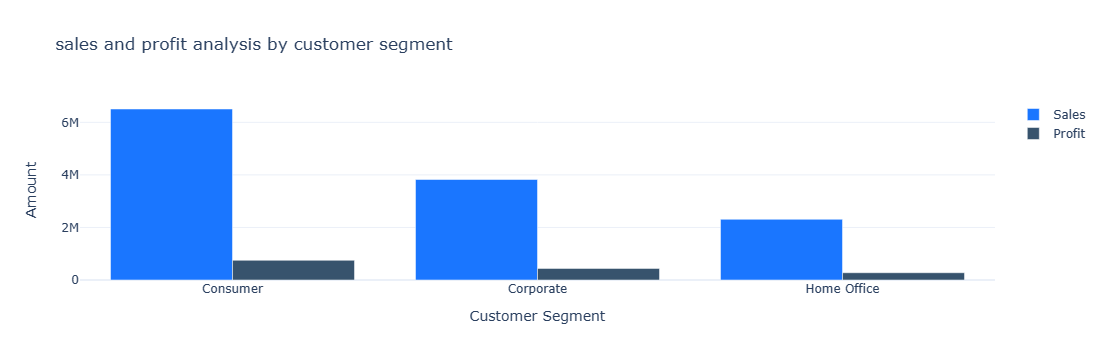

In [42]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x = sales_profit_by_segment['Segment'],
                     y = sales_profit_by_segment['Sales'],
                      name = 'Sales', marker_color='rgb(26, 118, 255)'))
fig.add_trace(go.Bar(x = sales_profit_by_segment['Segment'],
                    y = sales_profit_by_segment['Profit'],
                    name= 'Profit',marker_color='rgb(55, 83, 109)'))

fig.update_layout(title = 'sales and profit analysis by customer segment', xaxis_title = 'Customer Segment', yaxis_title = 'Amount')
fig.show()